#Project 1
##IMDB Movie Data Analysis

### Part 1
####Loading the Data

In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library (ggplot2)
library(dplyr)
library(tidyverse)
df <- read.csv("https://github.com/dmembreno/MATH331/raw/refs/heads/main/imdb_movies.csv")

This is a collection of data collected directly from the IMDB website that contains detailed information on over 9,500 films.The origin of this data-set is from kaggle and the link to it is: "https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset". It contains four character variables, three numerical variables, four categorical variables, and one time based variable.


In [ ]:
summary(df)

    names              date_x              score          genre          
 Length:10178       Length:10178       Min.   :  0.0   Length:10178      
 Class :character   Class :character   1st Qu.: 59.0   Class :character  
 Mode  :character   Mode  :character   Median : 65.0   Mode  :character  
                                       Mean   : 63.5                     
                                       3rd Qu.: 71.0                     
                                       Max.   :100.0                     
   overview             crew            orig_title           status         
 Length:10178       Length:10178       Length:10178       Length:10178      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

In [ ]:
head(df)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Creed III,3/2/2023,73,"Drama, Action","After dominating the boxing world, Adonis Creed has been thriving in both his career and family life. When a childhood friend and former boxing prodigy, Damien Anderson, resurfaces after serving a long sentence in prison, he is eager to prove that he deserves his shot in the ring. The face-off between former friends is more than just a fight. To settle the score, Adonis must put his future on the line to battle Damien — a fighter who has nothing to lose.","Michael B. Jordan, Adonis Creed, Tessa Thompson, Bianca Taylor, Jonathan Majors, Damien Anderson, Wood Harris, Tony 'Little Duke' Evers, Phylicia Rashād, Mary Anne Creed, Mila Davis-Kent, Amara Creed, Florian Munteanu, Viktor Drago, José Benavidez Jr., Felix Chavez, Selenis Leyva, Laura Chavez",Creed III,Released,English,7.50e+07,271616668,AU
2,Avatar: The Way of Water,12/15/2022,78,"Science Fiction, Adventure, Action","Set more than a decade after the events of the first film, learn the story of the Sully family (Jake, Neytiri, and their kids), the trouble that follows them, the lengths they go to keep each other safe, the battles they fight to stay alive, and the tragedies they endure.","Sam Worthington, Jake Sully, Zoe Saldaña, Neytiri, Sigourney Weaver, Kiri / Dr. Grace Augustine, Stephen Lang, Colonel Miles Quaritch, Kate Winslet, Ronal, Cliff Curtis, Tonowari, Joel David Moore, Norm Spellman, CCH Pounder, Mo'at, Edie Falco, General Frances Ardmore",Avatar: The Way of Water,Released,English,4.60e+08,2316794914,AU
3,The Super Mario Bros. Movie,4/5/2023,76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main, Brooklyn plumbers—and brothers—Mario and Luigi are transported down a mysterious pipe and wander into a magical new world. But when the brothers are separated, Mario embarks on an epic quest to find Luigi.","Chris Pratt, Mario (voice), Anya Taylor-Joy, Princess Peach (voice), Charlie Day, Luigi (voice), Jack Black, Bowser (voice), Keegan-Michael Key, Toad (voice), Seth Rogen, Donkey Kong (voice), Fred Armisen, Cranky Kong (voice), Kevin Michael Richardson, Kamek (voice), Sebastian Maniscalco, Spike (voice)",The Super Mario Bros. Movie,Released,English,1.00e+08,724459031,AU
4,Mummies,1/5/2023,70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three mummies end up in present-day London and embark on a wacky and hilarious journey in search of an old ring belonging to the Royal Family, stolen by ambitious archaeologist Lord Carnaby.","Óscar Barberán, Thut (voice), Ana Esther Alborg, Nefer (voice), Luis Pérez Reina, Carnaby (voice), María Luisa Solá, Madre (voice), Jaume Solà, Sekhem (voice), José Luis Mediavilla, Ed (voice), José Javier Serrano Rodríguez, Danny (voice), Aleix Estadella, Dennis (voice), María Moscardó, Usi (voice)",Momias,Released,"Spanish, Castilian",1.23e+07,34200000,AU
5,Supercell,3/17/2023,61,Action,"Good-hearted teenager William always lived in hope of following in his late father’s footsteps and becoming a storm chaser. His father’s legacy has now been turned into a storm-chasing tourist business, managed by the greedy and reckless Zane Rogers, who is now using William as the main attraction to lead a group of unsuspecting adventurers deep into the eye of the most dangerous supercell ever seen.","Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quinn Brody, Daniel Diemer, William Brody, Jordan Kristine Seamón, Harper Hunter, Alec Baldwin, Zane Rogers, Richard Gunn, Bill Brody, Praya Lundberg, Amy, Johnny Wactor, Martin, Anjul Nigam, Ramesh",Supercell,Released,English,7.70e+07,340941959,US
6,Cocaine Bear,2/23/2023,66,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of cops, criminals, tourists and teens converge in a Georgia forest where a 500-pound bl

###Part 2
#### Data Preparation

Prior to creating any univariate plots or exploring the data, I renamed the variables for more clarity. I also took the opportunity to appropriately modfiy the variable types and try to remove any areas where there is missing or unavailable data.

In [ ]:
column_types <- sapply(df, class)
print(column_types)

      names      date_x       score       genre    overview        crew 
"character" "character"   "integer" "character" "character" "character" 
 orig_title      status   orig_lang    budget_x     revenue     country 
"character" "character" "character"   "numeric"   "numeric" "character" 


Here I decided to convert the genre, country, original language, and status from character categories to factors. I decided to do this because it is more efficient, in some cases, to convert categoricals as factors rather than character in the context of data analysis and variable manipulation. I read multiple articles on the issues and one document I will link one docmnet I came across here:"https://www.stat.berkeley.edu/%7Es133/factors.html".

In [ ]:
df$country <- as.factor(df$country)
df$status <- as.factor(df$status)
df$genre <- as.factor(df$genre)
df$orig_lang <- as.factor(df$orig_lang)

In [ ]:
#Lets check the data types again
column_types <- sapply(df, class)
print(column_types)

      names      date_x       score       genre    overview        crew 
"character" "character"   "integer"    "factor" "character" "character" 
 orig_title      status   orig_lang    budget_x     revenue     country 
"character"    "factor"    "factor"   "numeric"   "numeric"    "factor" 


In the following code block I searched for duplicate data and aimed to remove it in order to ensure accuracy when we are further along in our project. However since the results indicated that there were no repitions, we were set to go on ahead.

In [ ]:
df %>%
  group_by_all() %>% #This code groups the data frame by its columns, finds repeated rows--
  filter(n()>1) %>%#--then, it ungroups them
  ungroup()

names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
<chr>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<fct>


In [ ]:
nrow(df)# about 10k rows prior to N/A removal

[1] 10178

In [ ]:
#Checking for N/A values
na_values <- is.na(df)
sum(na_values)

[1] 0

Since there are no N/A values there was no need for me to continue removing any.

As the final step to this section of this project I concluded by finally renaming the variables for simplicity.

In [ ]:
colnames(df)

[1] "names"      "date_x"     "score"      "genre"      "overview"  
 [6] "crew"       "orig_title" "status"     "orig_lang"  "budget_x"  
[11] "revenue"    "country"

In [ ]:
df <- df %>%
  rename(
    date = date_x,
    crew_members = crew,
    title = orig_title,
    original_language = orig_lang,
    budget = budget_x
  )

In [ ]:
colnames(df)

[1] "names"             "date"              "score"            
 [4] "genre"             "overview"          "crew_members"     
 [7] "title"             "status"            "original_language"
[10] "budget"            "revenue"           "country"

### Data Dictionary

In [ ]:
colnames(df)

[1] "names"             "date"              "score"            
 [4] "genre"             "overview"          "crew_members"     
 [7] "title"             "status"            "original_language"
[10] "budget"            "revenue"           "country"

####Data Dictionary for IMDB Movies Dataset
Character Variables


---


* names: Represents the name of each movie.

* overview: Provides a brief synopsis of each movie.
* crew_members: Lists the crew members involved in each movie's production.
* title: Represents the original title of each movie.

Date and Time Variables


---


* date: Indicates the release date of each film (month,day,year)>

Numerical Variables



---


* score: Represents the overall user rating of each movie.

* budget: Represents the budget allocated for each movie in dollars.
* revenue: Indicates the global revenue generated by each film in dollars.

Categorical Variables


---


* genre: Specifies the genre of each movie.

* status: Represents the release status of each film.
* original_language: Indicates the original language of each movie.
* country: Represents the country where each film was initially released.

###Part 3
#### Univariate Plots and Analysis

######setup

In [ ]:
#install.packages("showtext")

In [ ]:
library(showtext)
font_add_google("Montserrat","Montserrat")
font_add_google("Ubuntu","Ubuntu")
showtext_auto()

#####Date and Time Univariate Plot

For my univariate plot of the 'date' variable I decided to use a histogram. I thought that it could best represent the frequency of movies created over the set number of years in the dataset.

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"1903-05-15" "2001-12-25" "2013-05-09" "2008-06-15" "2019-10-17" "2023-12-31"

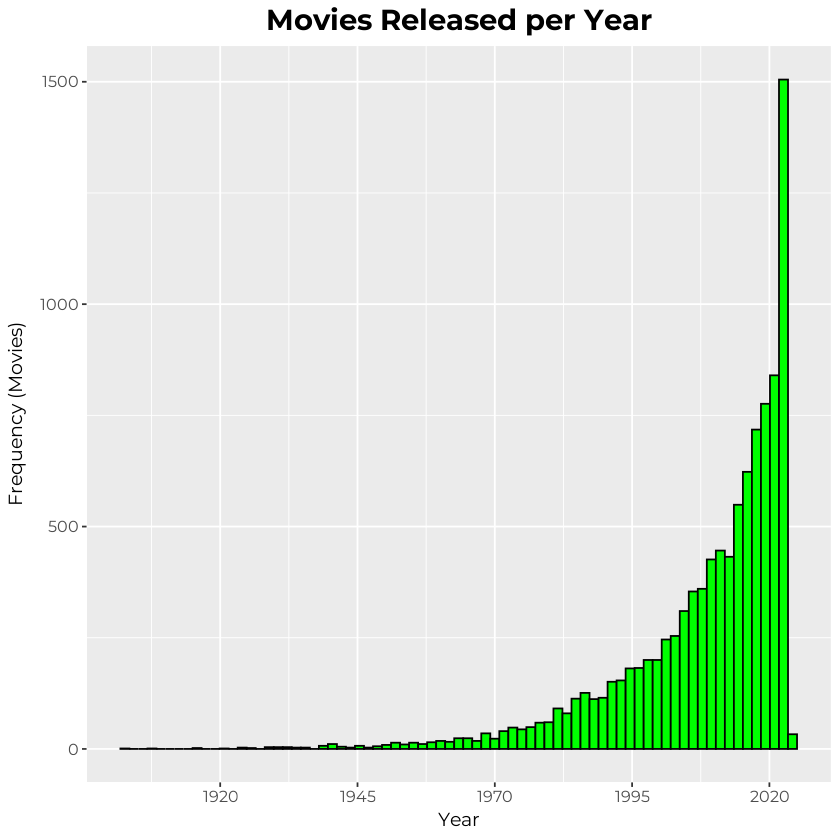

In [ ]:
df$date <- as.Date(df$date, format = "%m/%d/%Y")  #Changing date format
summary(df$date)

ggplot(df, aes(x = date)) +
  geom_histogram(binwidth = 600, fill = "green", color = "black") +
  labs(title = "Movies Released per Year",
       x = "Year",
       y = "Frequency (Movies)") +
  scale_x_date(date_labels = "%Y", breaks = scales::date_breaks("25 years"))+
    theme(
    plot.title = element_text(size = 22, face = "bold", hjust = 0.5,family = "Montserrat"),
    axis.title.x = element_text(size = 14, face = "plain",family = "Montserrat"),
    axis.title.y = element_text(size = 14, face = "plain",family = "Montserrat"),
    axis.text.x = element_text(size = 12,family = "Montserrat"),
    axis.text.y = element_text(size = 12,family = "Montserrat")
  )

This histogram demonstrates a clear trend in movie releases. As time in years increases on this diagram, the number of released movies increases. 1903, for example, is the first year included within the date section of the data set; it is hardly visible. As the bars approach 2023, however, the frequency of movies released within each year increases. If a smooth line were to be drawn over the boxes, it would very much resemble an exponential curve.

#####Categorical Univariate Plots

######Status


   In Production  Post Production         Released 
              16               31            10131 

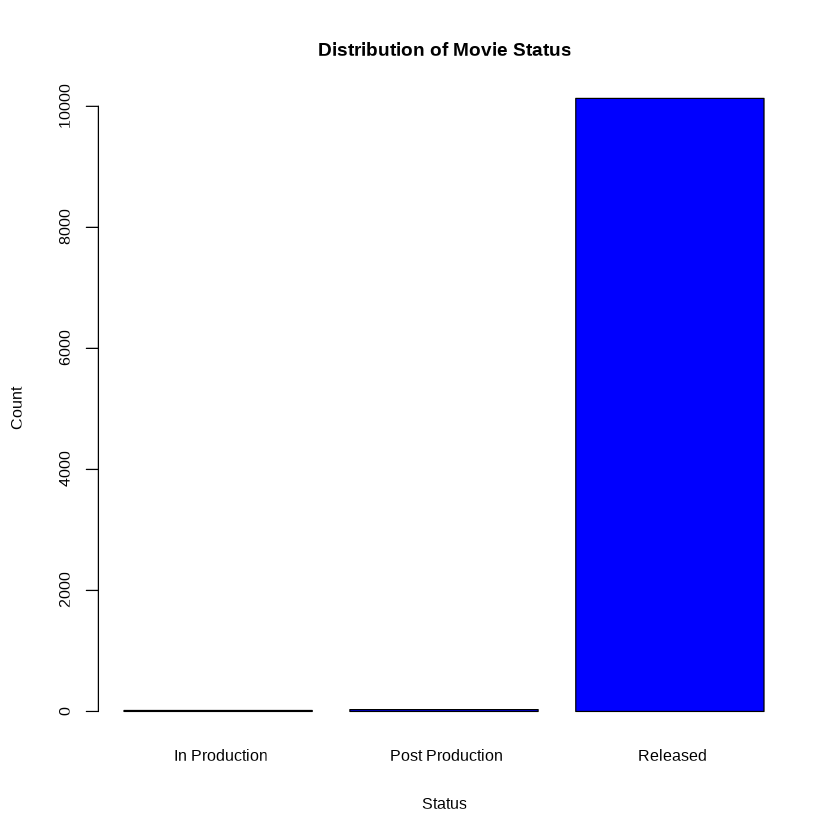

In [ ]:
barplot(table(df$status), main = "Distribution of Movie Status",
        xlab = "Status", ylab = "Count", col = "blue")
table(df$status)

While looking through the dataset on kaggle I noticed that an extremely large amount of the 'status' variable are 'Released'. In order to better comprehend this proportion I created a barplot from the table of 'status' and also included the table to give us a better idea. Films found on the IMDB dataset are mainly released.

######Genre


           Drama           Comedy   Drama, Romance           Horror 
             556              373              268              260 
Horror, Thriller 
             202 


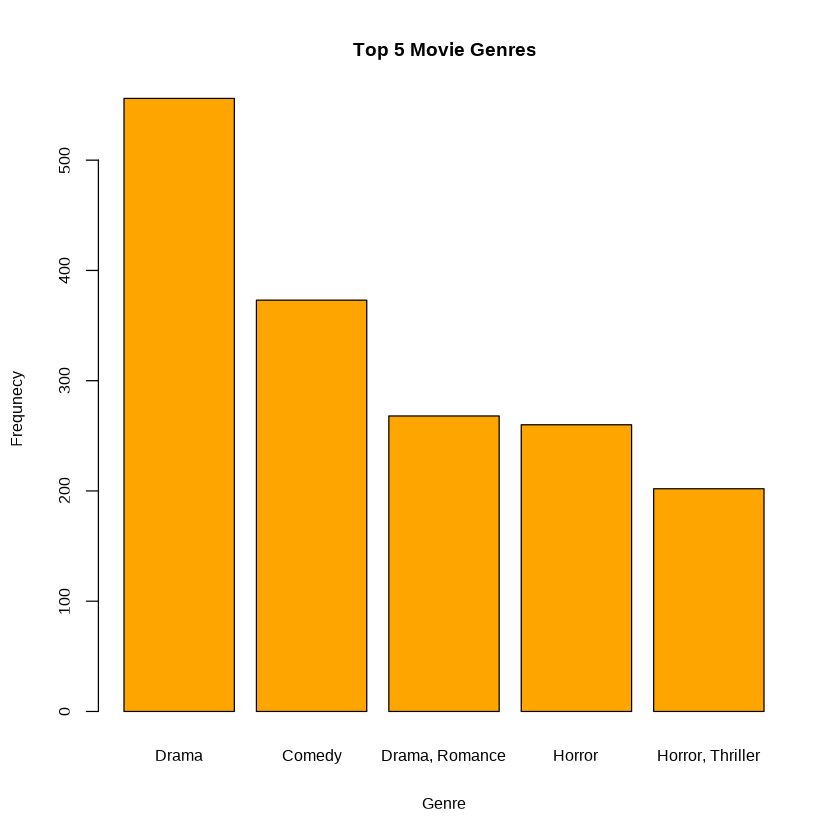

In [ ]:
genre_summary <- table(df$genre)
top_5genres <- sort(genre_summary, decreasing = TRUE)[1:5] #Collects top 5 most frequent genres
print(top_5genres)
barplot(top_5genres, main = "Top 5 Movie Genres",
        xlab = "Genre", ylab = "Frequnecy", col = "orange")

In [ ]:
top_10genres <- sort(genre_summary, decreasing = TRUE)[1:10]
top_10genres


           Drama           Comedy   Drama, Romance           Horror 
             556              373              268              260 
Horror, Thriller  Comedy, Romance      Documentary Action, Thriller 
             202              187              146              122 
   Comedy, Drama          Romance 
             121              117 

In [ ]:
length(df$genre)
sum(grepl("Drama",df$genre))
sum(grepl("Horror",df$genre))
sum(grepl("Comedy",df$genre))

[1] 10178

[1] 3812

[1] 1554

[1] 2943

When looking at the genres I formed a genre table, setup a top 5 genre barplot and made an intersting observation. Out of a total amount of 10178 genre observations, 3812 containt the "Drama" genre in some variation or another. Similarly, "Comedy" and "Horror" also show up frequently.

######Original Language

Even before coding , the connection between original language and country seemed obvious. I assumed that for each country of origin, a corresponding original language would match.

For the Original language variable, I aimed to layout the 5 least and most common in the dataset.

For more clarity, I also turned the table result into their own data frames.

In [ ]:
lang_table <- table(df$original_language)
top5_lang<- sort(lang_table,decreasing =TRUE)[1:5]
bott5_lang<- sort(lang_table,decreasing = FALSE)[1:5]

top5_df <- as.data.frame(top5_lang)
colnames(top5_df)<- c("Language","Number")

bott5_df <- as.data.frame(bott5_lang)
colnames(bott5_df) <- c("Language","Number")

print("The top 5 original movie languages are")
print(top5_df)
print(" ")
print("The least 5 occuring original languages are")
print(bott5_df)

[1] "The top 5 original movie languages are"
             Language Number
1             English   7417
2            Japanese    714
3  Spanish, Castilian    397
4              Korean    388
5              French    285
[1] " "
[1] "The least 5 occuring original languages are"
                              Language Number
1                               Basque      1
2  Bokmål, Norwegian, Norwegian Bokmål      1
3                             Dzongkha      1
4                             Galician      1
5                             Gujarati      1


These results are not necessarily surprising, but it might be interesting to take a closer look at how laguage choice in film production can influence revenue for example. Perhaps it has a noticable effect on rating. Is appealing to the broader audience the right choice? We can't make any solid conclusion yet, but we should keep these questions in mind.

######Country

Similar to the Original Language variable, I wanted to find the top 5 most and least common countries in which the dataset's films were released in.

In [ ]:
country_table <- table(df$country)
top5_countries<- sort(country_table,decreasing =TRUE)[1:5]
bott5_countries<- sort(country_table,decreasing = FALSE)[1:5]

top5_dfc <- as.data.frame(top5_countries)
colnames(top5_dfc)<- c("Country","Number")

bott5_dfc <- as.data.frame(bott5_countries)
colnames(bott5_dfc) <- c("Country","Number")

print("The top 5 most frequently occuring countries are")
print(top5_dfc)
print(" ")
print("The 5 least occuring countries are ")
print(bott5_dfc)

[1] "The top 5 most frequently occuring countries are"
  Country Number
1      AU   4885
2      US   2750
3      JP    538
4      KR    361
5      FR    222
[1] " "
[1] "The 5 least occuring countries are "
  Country Number
1      BO      1
2      BY      1
3      DO      1
4      IL      1
5      KH      1


These results are a little more unexpected compared to the original language ones. I was definitely not expecting AU or Australia to be the most frequently occuring. I wonder why this might be. Is there a measurable benefit to this that can be found within this dataset?

#####Numerical Univariate Plots

######Score

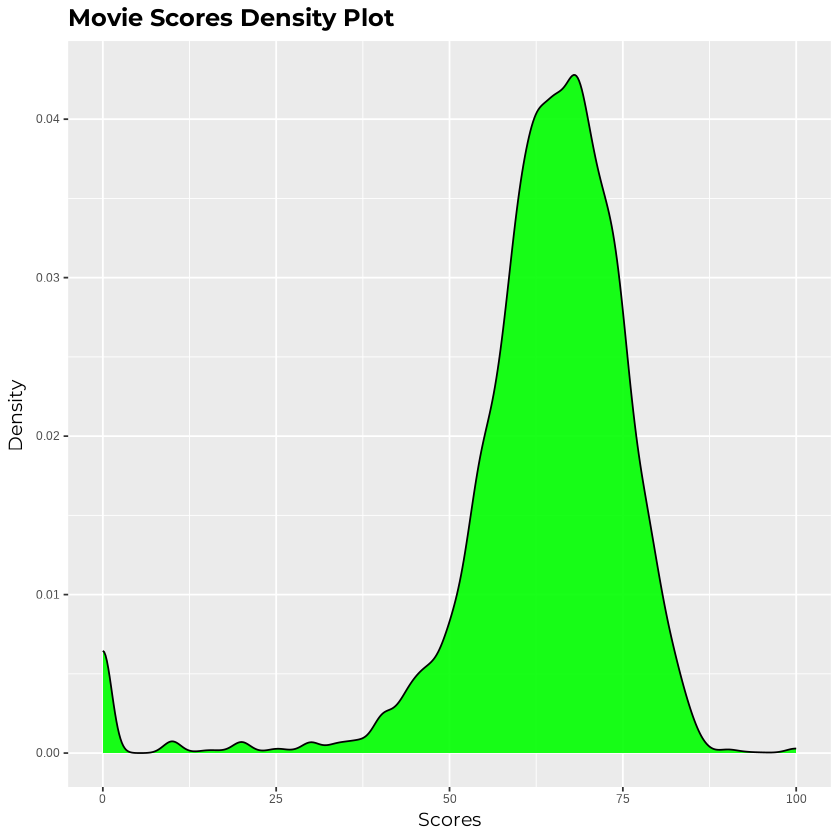

In [ ]:
ggplot(df, aes(x = score)) +
  geom_density(fill = "green", color = "black", alpha = 0.9) +
  labs(
    title = "Movie Scores Density Plot",
    x = "Scores",
    y = "Density"
  ) +
    labs()+
  theme(plot.title = element_text(size=18,face="bold",color="black",family = "Montserrat"),
    axis.title.x = element_text(size=14,face="plain", family="Montserrat",color = "black"),
    axis.title.y = element_text(size=14,face="plain", family="Montserrat",color = "black"))

For the analysis and visual diagram of scores, I could have taken several appraoches but I stuck with using a desnity plot. A histogram would have looked failry similar but this curve allows you to better see the density distribtuion of the scores clearer than a histogram. As we can see here, the approximate mean falls between the range of around 55 to 75. The density for movies rated at 85 or higher is not that significant. There is however a notable small peak in the spot between 0 and 15.

######Budget

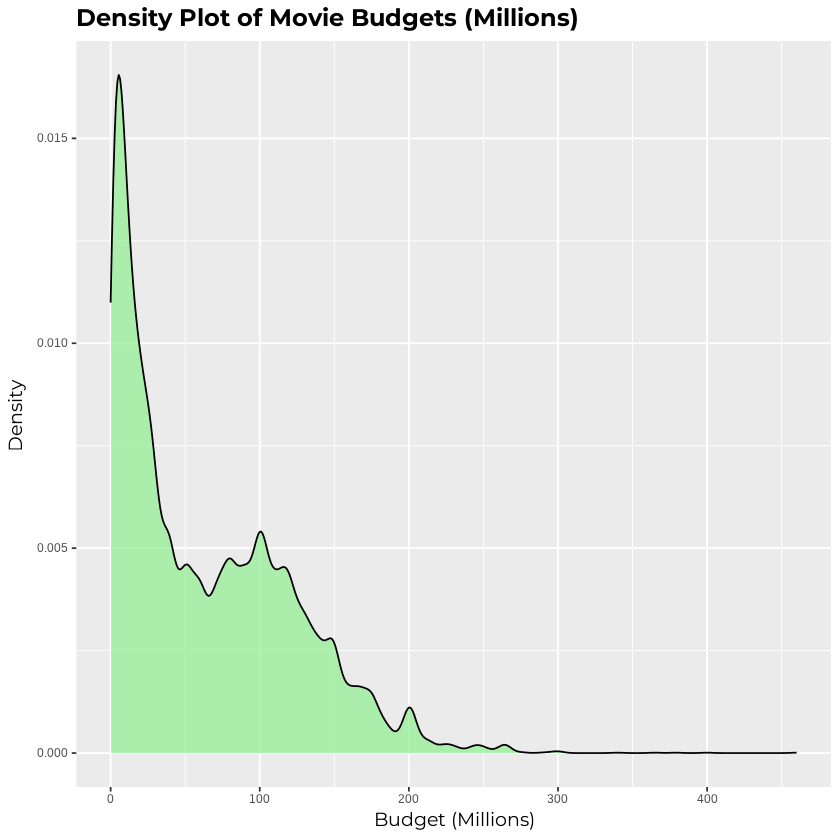

In [ ]:
ggplot(df, aes(x = budget / 1e6)) +
  geom_density(fill = "lightgreen", color = "black", alpha = 0.7, adjust = 0.5) +
  labs(
    title = "Density Plot of Movie Budgets (Millions)",
    x = "Budget (Millions)",
    y = "Density"
  )+
    labs()+
  theme(plot.title = element_text(size=18,face="bold",color="black",family = "Montserrat"),
    axis.title.x = element_text(size=14,face="plain", family="Montserrat",color = "black"),
    axis.title.y = element_text(size=14,face="plain", family="Montserrat",color = "black"))

I also chose to use a density plot for the budget variable. Here we can see that the budget tends to group and peak at about the 25-35 million area. This seems to potentially indicate some sort of threshhold being reached for mid budget film productions. The plot the sharply descends and holds around 100million before gradually decreasing, there are few films that exceed this range in significantly smaller numbers. I would say that for the area under the curve, most films are at about a budget of 30 to 130 million.

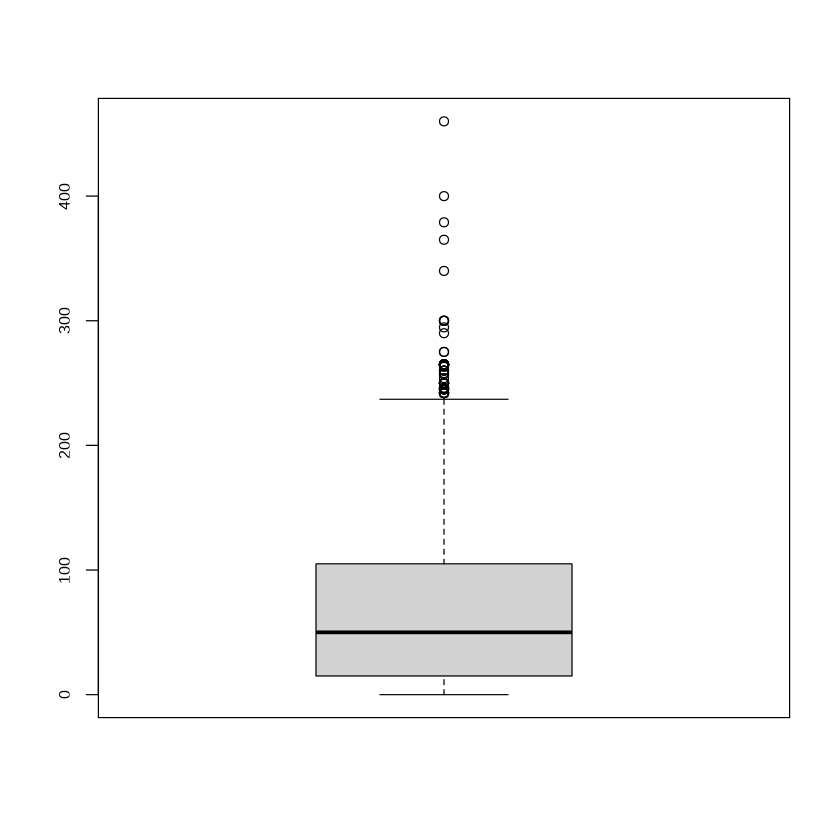

In [ ]:
boxplot(df$budget/1e6)

A quick boxplot of the budget seems to confirm my initial analysis where the number of outliers are few but several do exist in bounds greater than 200 million dollars.

######Revenue

Taking the lead from my other numerical variables, revenue will also employ the use of a density plot but will also have an assitional boxplot.

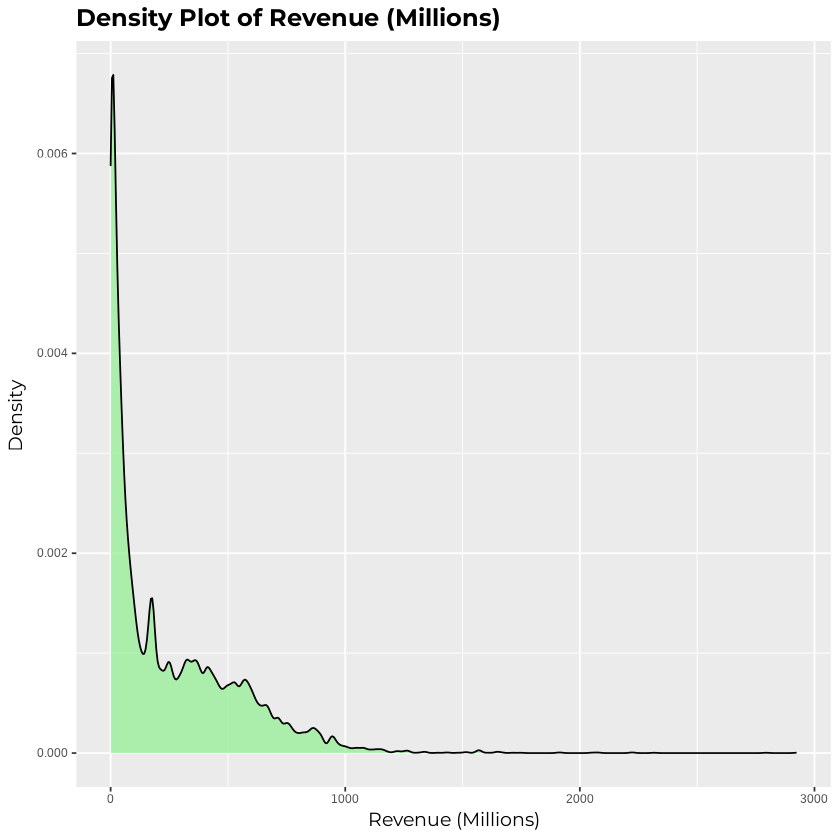

In [ ]:
ggplot(df, aes(x = revenue / 1e6)) +
  geom_density(fill = "lightgreen", color = "black", alpha = 0.7, adjust = 0.3) +
  labs(
    title = "Density Plot of Revenue (Millions)",
    x = "Revenue (Millions)",
    y = "Density"
  )+
    labs()+
  theme(plot.title = element_text(size=18,face="bold",color="black",family = "Montserrat"),
    axis.title.x = element_text(size=14,face="plain", family="Montserrat",color = "black"),
    axis.title.y = element_text(size=14,face="plain", family="Montserrat",color = "black"))

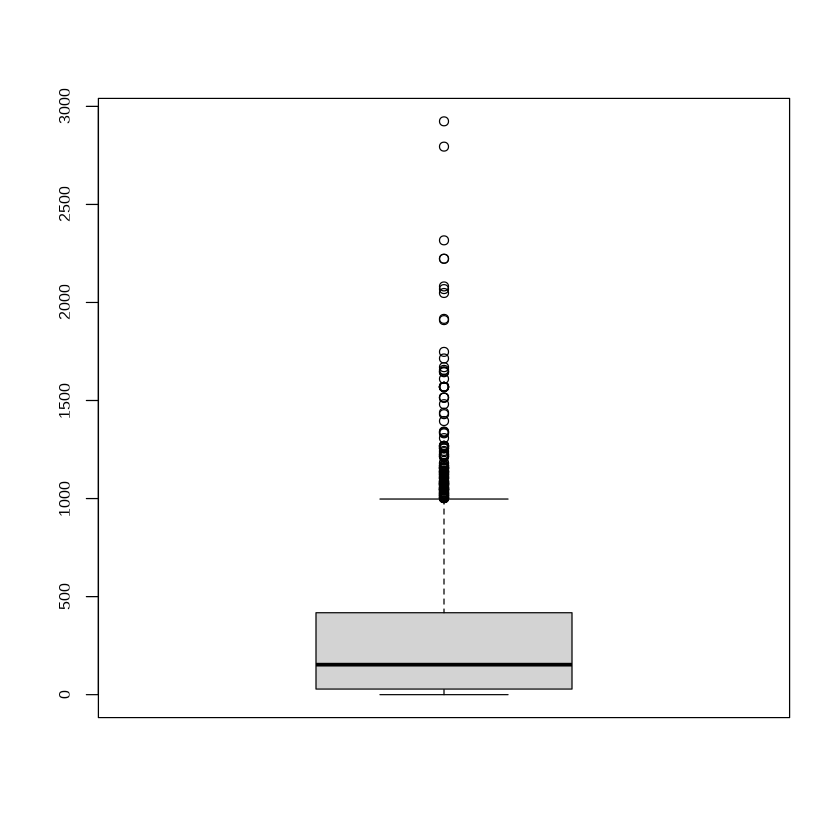

In [ ]:
boxplot(df$revenue/1e6)

At first sight, the revenue and budget graphics look awfully similar. Even the placement of the outliers look similar. The revenue desnity plot peaks at around a little less than 150 million and then sharply falls and gradually decreases form 250 million and onward. The revenue boxplot is mostly located under the 500 million mark and has numerous outliers beyound that and even 1000 million. Perhaps through a multivariate plot we can gain more understanding on what factors influence revenue most.

#####Character Variables

For the 'Names', 'Overview', 'Crew' and 'Original Title' variables, it does not make too much sense to use plots, so I opted out of doing so.

When looking at some examples of Names and Original Title on kaggle I saw no difference, so I decided to compare them and find out if there were any differences or if the amount of columns in the dataset could be reduced.

In [ ]:
dft <- data.frame(df$title,df$names)
dft$equal <- df$title==df$names
print (sum(dft$equal))

[1] 7804


Alright, so there are 7804 cases in which the original title and the name of a movie are the same. This is more than the majority but in order to prevent data loss, it is not a great idea to remove any columns.

Earlier in the genre analysis we observed how 'Comedy', 'Horror', and 'Drama' were very frequently occuring. Let's see if the same could be observed through the movie overview. Essentially, will we find out if these words are also commonly occuring in the overview column or not.

In [ ]:
sum(grepl("drama|Drama",df$overview))
sum(grepl("comedy|Comedy",df$overview))
sum(grepl("horror|Horror",df$overview))

[1] 86

[1] 56

[1] 92

Although I assumed it wasn't common practice to mention the genre in the overview or movie description, I am still surprised that these specific words occur so infrequently.

In [ ]:
sum(grepl("action|Action",df$overview))

[1] 238

Now, this is an interesting find. Why does "action" occur more frequently in the overview than the other three genres I checked, but it was not in the top five or ten genres previously? What does the word "action" bring to the overview that "horror", "comedy", or "drama" can't?

### Part 4
####Bivariate/Multivariate Plots and Analysis

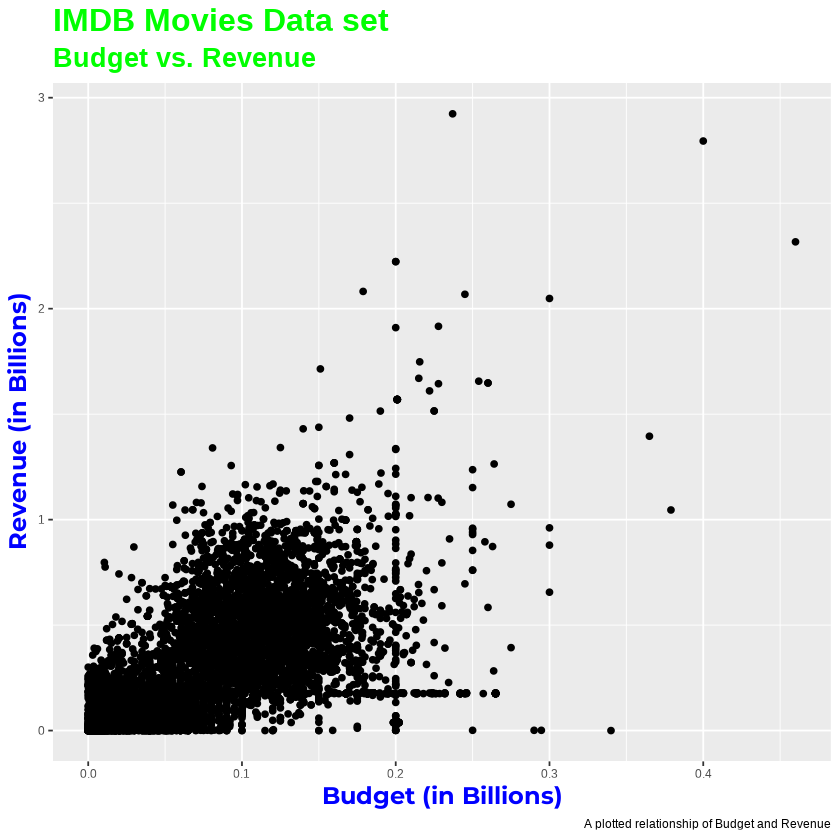

In [ ]:
ggplot(df, aes(x = budget/ 1e9 , y = revenue/ 1e9)) +
  geom_point() +
  labs(
    title = "IMDB Movies Data set",
    subtitle = "Budget vs. Revenue",
    x = "Budget (in Billions)",
    y = "Revenue (in Billions)",
    caption = "A plotted relationship of Budget and Revenue"
  )+theme(
    plot.subtitle = element_text(size=20,face="bold",color="green"),
    plot.title = element_text(size=24,face="bold",color="green"),
    axis.title.x = element_text(size=18,face="bold", family="Montserrat",color = "blue"),
    axis.title.y = element_text(size=18,face="bold", family="Montserrat",color = "blue"))

For my first bivariate plot, I decided to focus on the relationship between revenue and budget. However, the scatterplot appears to be unclear. There seems to be a relationship, but it's not as strong as I initially thought it would be.

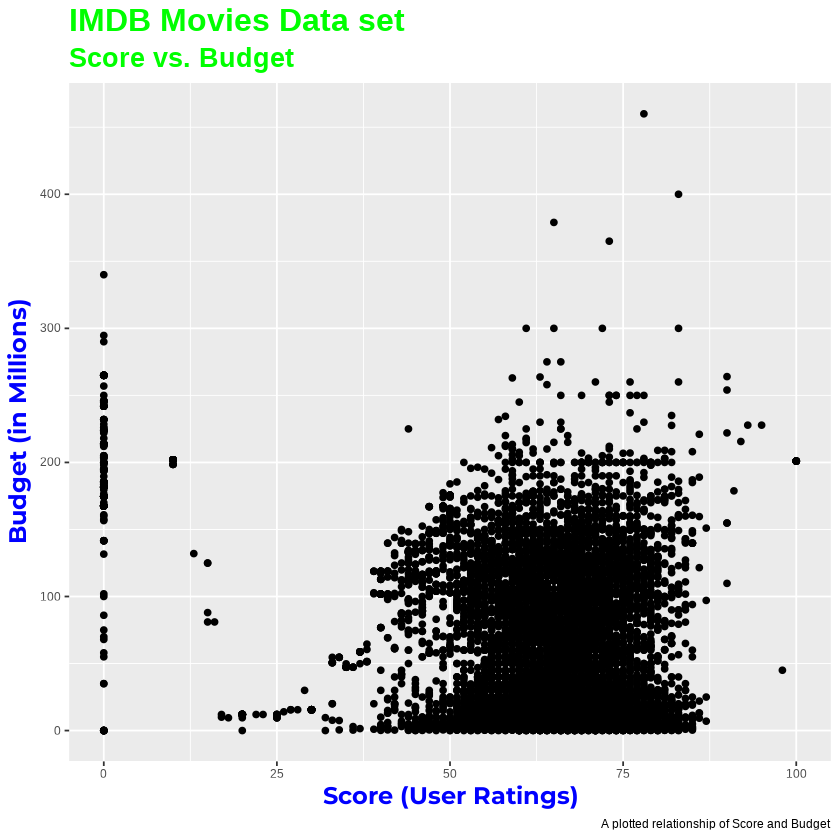

In [ ]:
ggplot(df, aes(x = score , y = budget/ 1e6)) +
  geom_point() +
  labs(
    title = "IMDB Movies Data set",
    subtitle = "Score vs. Budget",
    x = "Score (User Ratings)",
    y = "Budget (in Millions)",
    caption = "A plotted relationship of Score and Budget"
  )+theme(
    plot.subtitle = element_text(size=20,face="bold",color="green"),
    plot.title = element_text(size=24,face="bold",color="green"),
    axis.title.x = element_text(size=18,face="bold", family="Montserrat",color = "blue"),
    axis.title.y = element_text(size=18,face="bold", family="Montserrat",color = "blue"))

Here, the relationship between budget and score seems almost non-existent, as if other factors that inlfuence the score keep it mainly between 50 and 75. The budget variation had no observable effect. Now this isn't to say that film production costs don't matter, but maybe past a certain threshold, budget starts losing influence on this facotr. There is no conclusive outcome from this.

Let's also look at the relationship between revenue and country.

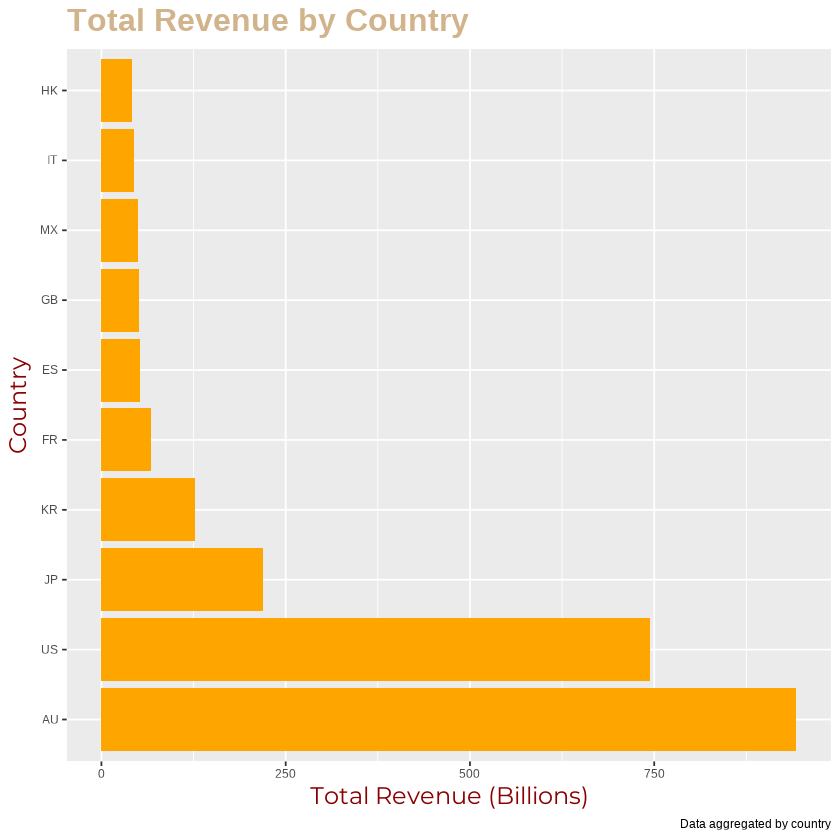

In [ ]:
revenue_by_country <- df %>%
  group_by(country) %>%
  summarise(total_revenue = sum(revenue, na.rm = TRUE), .groups = 'drop') %>%# we are grouping by country, igrnoing NA values and fropping hte grouping after a new df is created
  arrange(desc(total_revenue))#this decsends from top to bottom, the first country is the one with the highest revenue

top_10countries<-head(revenue_by_country,10)

ggplot((top_10countries),aes(x=reorder(country,-total_revenue),y=total_revenue/1e9))+#we only want to use the top 10 to avoid using too much info
  geom_bar(stat = "identity",fill="orange")+
  coord_flip() +
  labs(
    title = "Total Revenue by Country",
    x = "Country",
    y = "Total Revenue (Billions)",
    caption = "Data aggregated by country"
  )+
  theme(
    plot.title = element_text(size=24,face="bold",color="tan"),
    axis.title.x = element_text(size=18,face="plain", family="Montserrat",color = "darkred"),
    axis.title.y = element_text(size=18,face="plain", family="Montserrat",color = "darkred"))



Now, I have another question. Is Australia, the most frequently occuring country in the dataset because it produces the highest revenue? Or maybe it's the other way around? Either way, it is still an intersting fact. So with Australia and the United States making the majority around 750 billion and more. Japan coming in third makes a little less than a third of the US and the numbers descend from there to each of the following countries.

In [ ]:
top5_languages <- top5_df$Number
top5_countries <- top5_dfc$Number

combined_df <- data.frame(
  Language = top5_df$Language,
  Country = top5_dfc$Country,
  Movies = pmin(top5_languages, top5_countries)
)
combined_df <- combined_df[1:5, ] # Keeping only top 5


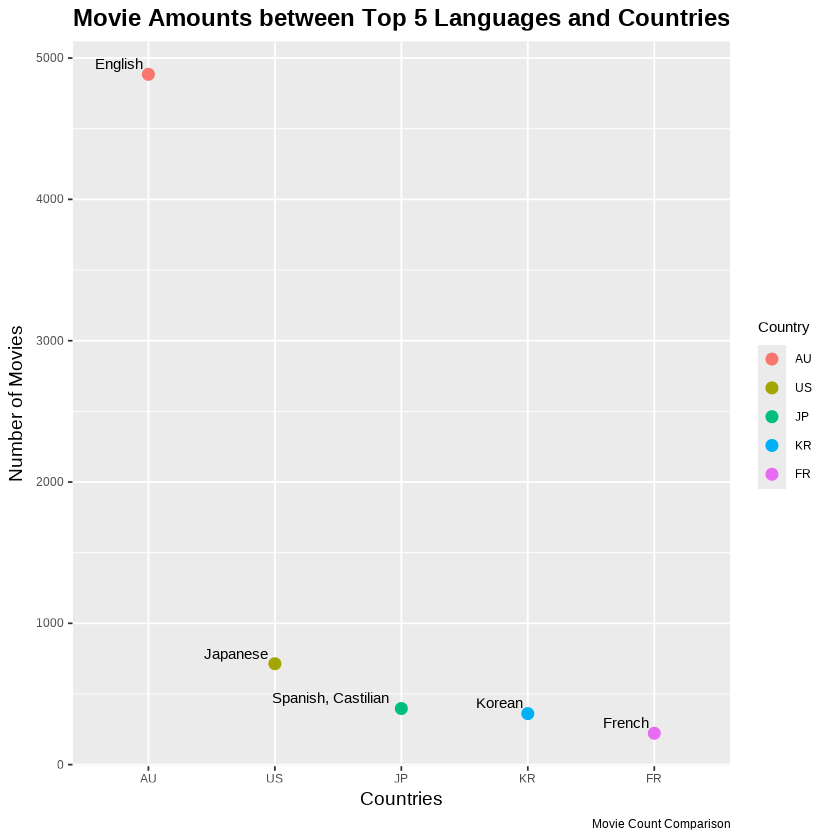

In [ ]:
ggplot(combined_df, aes(x = Country, y = Movies, label = Language)) +
  geom_point(aes(color = Country), size = 3) +
  geom_text(vjust = -0.5, hjust = 1.1, size = 4) +
  labs(
    title = "Movie Amounts between Top 5 Languages and Countries",
    x = "Countries",
    y = "Number of Movies",
    caption = "Movie Count Comparison"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14)
  )


This plot explains what we already saw earlier, the amount of originally English films in this data set outnumbers any other language by far. We now know that the majority of these are from Australian and US profuctions. Here we can see how Japanese, Spanish/Castillan, Korean, and French follow after a massive gap.

### Part 5
####Findings and Overview

There are several key ideas of our findings from this data set.
First of all, our languages, English, Japanese, Spanish, Korean, and French were found to be the most frequently occurring. Basque, Bokmål, Dzongkha, Galician, and Gujarati were the rarest appearances. This indicates that if you aim to target high consumer, markets, it might be better to use the more recurring languages. However, if you aim to target untapped markets in the film industry, utilizing the less frequent languages might benefit you. It's important to note that more information is needed before drawing any conclusions.

The top movie producers were Australia, the US, Japan, South Korea, and France, while Bolivia, Belarus, and the Dominican Republic had minimal film production.

When looking at numerical variables, most scores fall within the range of 55 to 75, although some are lower. Film budgets typically range from 25 to 35 million, with slightly more than half being less than 100 million. Revenue mostly remains under the 500 million mark, but there are some significant outliers.

As part of our bivariate analysis, we looked at budget vs. revenue. What we found was a generally weak relationship on a scatterplot. It is not necessarily insignificant but most certainly does not represent a causal relationship. We also found that budget and score have almost no relationship. We are unsure whether higher budgets contribute to higher scores because, despite the budgets, scores tended to remain the same.

The countries with the most appearances in the dataset are Australia and the United States, and they also generate the highest total revenue. This suggests that there may be a strong connection between production and revenue compared to other factors. Additionally, the US and Australia heavily contribute to the composition of the IMDB dataset, particularly with English-language films.

There are some important questions that need to be addressed through further data analysis:
What influence does language have on revenue?
At what point does budget become less important when considering core and revenue?
Which genre types perform best based on revenue and rating metrics

There are additional questions that can focus on the release time period of the movie or on the observation of outliers, but that is for another time.

In [ ]:
system("jupyter nbconvert --to html /content/ProjectMATH331.ipynb")